In [79]:
import h5py
import matplotlib.pyplot as plt
import numpy as np 
from pathlib import Path

from src.image import img_from_output
from src.graph_features import compute_graph_features
from skimage.transform import resize

In [43]:
raw_data = Path('..','data', 'candidate-grains-raw','2021_01_07_09_12_candidate_grains_master', 'spparks_results',)
runs = list(raw_data.glob('*run*'))


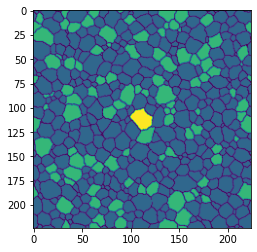

In [83]:
def img_and_label(root):
    img = img_from_output(root)
    root = Path(root)
    initfile = root / 'initial.dream3d'
    statsfile = root / 'stats.h5'

    assert initfile.is_file(), f'{str(initfile.absolute())} not found!'
    assert statsfile.is_file(), f'{str(statsfile.absolute())} not found!'



    init = h5py.File(initfile, 'r')
    stats = h5py.File(statsfile, 'r')
    sv = init['DataContainers']['SyntheticVolume']

    grain_labels = np.asarray(sv['CellFeatureData']['AvgQuats'])[1:]
    grain_labels = (grain_labels > 0).sum(1) - 1

    grain_sizes = np.asarray(stats['grainsize'])[:, 1:]
    timesteps = np.asarray(stats['time'])

    gf = compute_graph_features(img, grain_labels, grain_sizes, timesteps)
    agg = int(gf['candidate_growth_ratio'] > 10 and gf['candidate_rgr'] > 2.5)
    return img, agg
test_img, test_gf = img_and_label(runs[2])

test_gf
plt.imshow(resize(test_img, (224,224)))
    